# Predicción de Tumor Benigno o Maligno

En este trabajo se intentará predecir si el tumor es : Benigno o Maligno. Para ello los valores que representarán estas condiciones son 0 y 1 respectivamente. 
- Los datos para generar la predicción se encuentra en el archivo "mammographic_masses.data.txt".
- La descripción de la información se encuentra en el archivo "mammographic_masses.names.txt" <br><br>
Ahora se procedere con la exploración de los datos

## Análisis y Exploración de datos

Lo primero será reservar la primera celda para la importación de todas las librerías necesarias para poder trabajar en este proyecto. Librerías desde la manipulación de datos hasta para entrenar a modelos.

In [1]:
#Procesamiento de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


#Entrenamiento y reporte
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#modelos Plus
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

#Estandarizar
from sklearn.preprocessing import StandardScaler


Using TensorFlow backend.


In [2]:
def convertirValorDesconocido(valor):
    if valor == "?":
        return np.NaN
    
    else:
        return float (valor)

filtro={
    "BI-RADS":convertirValorDesconocido,
    "Edad":convertirValorDesconocido,
    "Forma Masa":convertirValorDesconocido,
    "Margen Masa":convertirValorDesconocido,
    "Densidad Masa":convertirValorDesconocido,
    "Severidad": convertirValorDesconocido
}

    
#, converters=filtro
mamografiaCabeceras = ["BI-RADS", "Edad", "Forma Masa", "Margen Masa", "Densidad Masa", "Severidad"]

mamografias = pd.read_csv("mammographic_masses.data.txt", names = mamografiaCabeceras, converters=filtro)

In [3]:
mamografias.head()

,BI-RADS,Edad,Forma Masa,Margen Masa,Densidad Masa,Severidad
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,NaN,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,NaN,1.0


In [4]:
mamografias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS          959 non-null float64
Edad             956 non-null float64
Forma Masa       930 non-null float64
Margen Masa      913 non-null float64
Densidad Masa    885 non-null float64
Severidad        961 non-null float64
dtypes: float64(6)
memory usage: 45.1 KB


In [5]:
mamografias.isna().sum()

BI-RADS           2
Edad              5
Forma Masa       31
Margen Masa      48
Densidad Masa    76
Severidad         0
dtype: int64

In [6]:
mamografias.describe()

,BI-RADS,Edad,Forma Masa,Margen Masa,Densidad Masa,Severidad
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Se obtiene una relación entre el margen y la severidad

In [7]:
mamografias[["Margen Masa", "Severidad"]].groupby(['Margen Masa'], as_index=False).mean().sort_values(by='Severidad', ascending=False)

,Margen Masa,Severidad
4,5.0,0.838235
3,4.0,0.682143
2,3.0,0.629310
1,2.0,0.625000
0,1.0,0.114846


Se visualiza una relación fuerte entre margen de la masa con la severidad del tumor

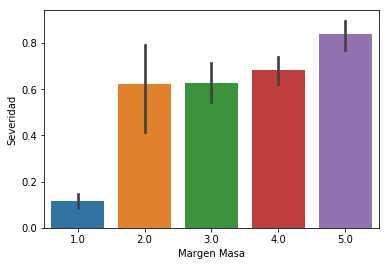

In [8]:
sns.barplot(x=mamografias['Margen Masa'], y=mamografias["Severidad"])

In [9]:
mamografias[["Forma Masa", "Severidad"]].groupby(['Forma Masa'], as_index=False).mean().sort_values(by='Severidad', ascending=False)

,Forma Masa,Severidad
3,4.0,0.787500
2,3.0,0.473684
0,1.0,0.169643
1,2.0,0.165877


Aún más notorio, es con el caso de forma de la masa con la severidad del tumor. a tener una masa más irregular las probabilidades de tener tumor maligno aumentan

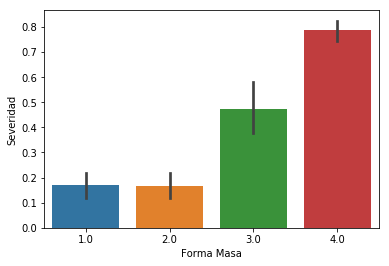

In [10]:
sns.barplot(x=mamografias['Forma Masa'], y=mamografias["Severidad"])

In [11]:
mamografias[["Densidad Masa", "Severidad"]].groupby(['Densidad Masa'], as_index=False).mean().sort_values(by='Severidad', ascending=False)

,Densidad Masa,Severidad
2,3.0,0.492481
0,1.0,0.437500
3,4.0,0.416667
1,2.0,0.305085


Con la densidad de la masa no se ve un factor muy determinando para determinar la severidad del tumor

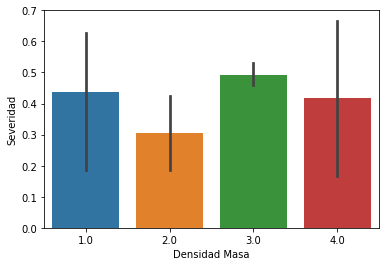

In [12]:
sns.barplot(x=mamografias['Densidad Masa'], y=mamografias["Severidad"])

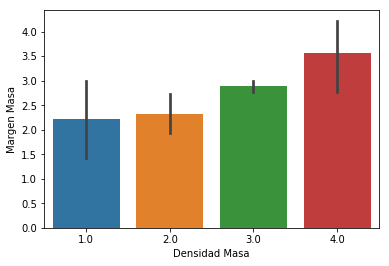

In [13]:
sns.barplot(x=mamografias['Densidad Masa'], y=mamografias["Margen Masa"])

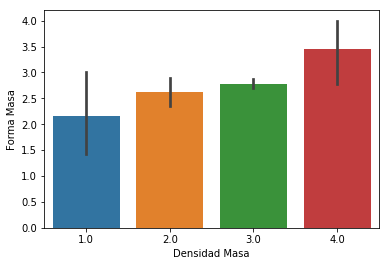

In [14]:
sns.barplot(x=mamografias['Densidad Masa'], y=mamografias["Forma Masa"])

In [15]:
mamografias[["BI-RADS", "Severidad"]].groupby(['BI-RADS'], as_index=False).mean().sort_values(by='Severidad', ascending=False)

,BI-RADS,Severidad
6,55.0,1.000000
4,5.0,0.884058
5,6.0,0.727273
0,0.0,0.600000
3,4.0,0.219378
2,3.0,0.166667
1,2.0,0.071429


(array([ 29.,  41.,  96., 153., 155., 205., 172.,  77.,  26.,   2.]),
 array([18. , 25.8, 33.6, 41.4, 49.2, 57. , 64.8, 72.6, 80.4, 88.2, 96. ]),
 <a list of 10 Patch objects>)

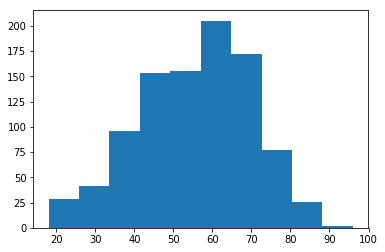

In [16]:
plt.hist(x=mamografias["Edad"])

Al categorizar las edades en 5 grupos, se visualiza que la probabilidad de tener un tumor maligno 
es mayor a medida que uno tiene mayor edad

In [17]:
mamografias['Rango Edad'] = pd.cut(mamografias['Edad'], 5)
mamografias[['Rango Edad', 'Severidad']].groupby(['Rango Edad'], as_index=False).mean().sort_values(by='Rango Edad', ascending=True)


,Rango Edad,Severidad
0,"(17.922, 33.6]",0.057143
1,"(33.6, 49.2]",0.269076
2,"(49.2, 64.8]",0.452778
3,"(64.8, 80.4]",0.726908
4,"(80.4, 96.0]",0.892857


Con la gráfica se entiende mejor, considerando entre los 50 a 60 donde empieza a tener mayor probabilidad de tener turmo maligno

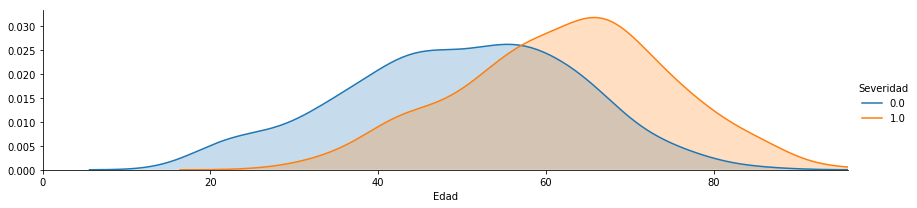

In [18]:
graficoSeveridadEdad = sns.FacetGrid(mamografias, hue="Severidad", aspect=4)
graficoSeveridadEdad.map(sns.kdeplot, "Edad", shade=True)
graficoSeveridadEdad.set(xlim=(0 , mamografias['Edad'].max()))
graficoSeveridadEdad.add_legend()

Con la gráfica siguiente se visualiza que tanta correlación pueda haber entre las variables, siendo forma, margen y edad los que mayor correlación se tiene con la severidad, por lo cual serán las variables a analizar

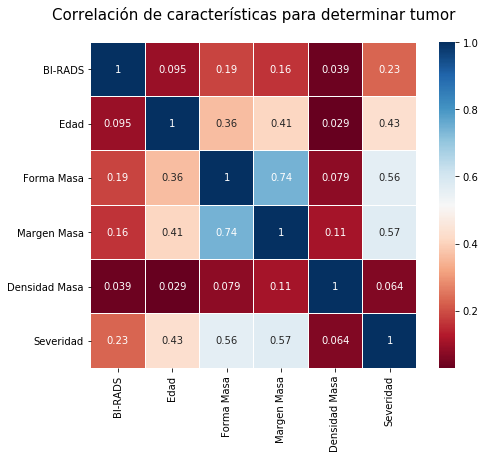

In [19]:
colormap = plt.cm.RdBu
plt.figure(figsize=(8,6))
plt.title('Correlación de características para determinar tumor', y=1.05, size=15)
sns.heatmap(mamografias.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

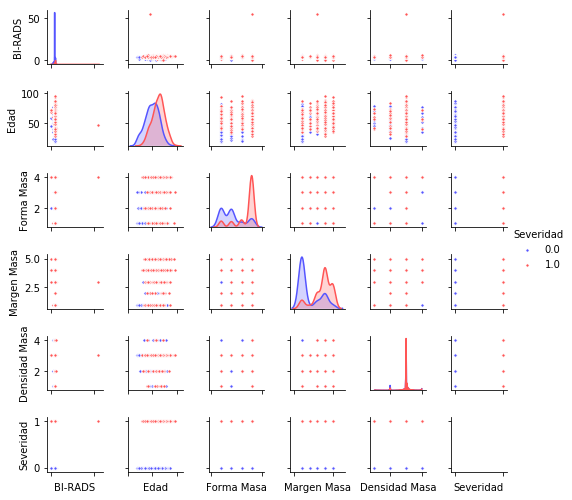

In [20]:
g = sns.pairplot(mamografias, hue='Severidad', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])


Se visualiza que tiendo algunos factores de margen con masa, y en relación con la edad, la severidad es má probable

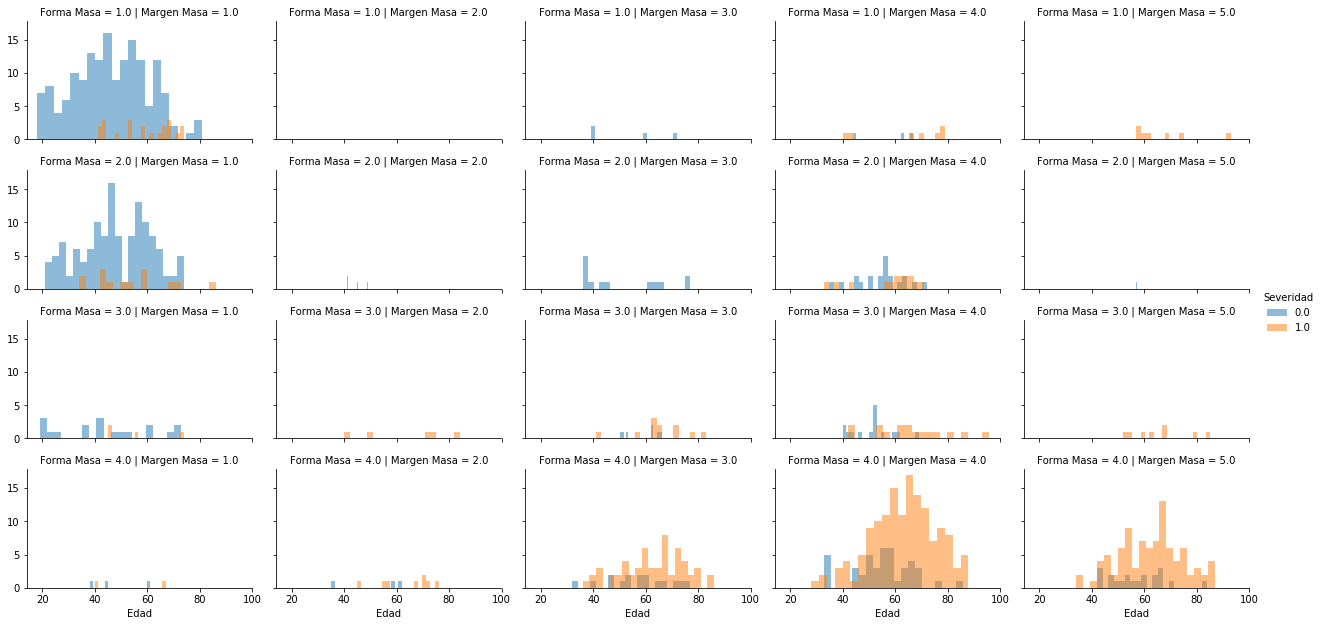

In [21]:
grid = sns.FacetGrid(mamografias, col='Margen Masa', row='Forma Masa',hue="Severidad", size=2.2, aspect=1.6)
grid.map(plt.hist, 'Edad', alpha=.5, bins=20)
grid.add_legend();

# Limpieza de datos

En este apartado se reemplazará la data faltante de 3 modos:
- Media + desviación estandar
- Media
- Eliminando filas con valores NaN


Los valores en NaN son transformados a la media de la característica

In [22]:
dataMedia = mamografias.copy()
dataMedia["Edad"] = dataMedia["Edad"].fillna(dataMedia['Edad'].median())
dataMedia["Forma Masa"] = dataMedia["Forma Masa"].fillna(dataMedia['Forma Masa'].median())
dataMedia["Margen Masa"] = dataMedia["Margen Masa"].fillna(dataMedia['Margen Masa'].median())
dataMedia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 7 columns):
BI-RADS          959 non-null float64
Edad             961 non-null float64
Forma Masa       961 non-null float64
Margen Masa      961 non-null float64
Densidad Masa    885 non-null float64
Severidad        961 non-null float64
Rango Edad       956 non-null category
dtypes: category(1), float64(6)
memory usage: 46.1 KB


Los registros donde alguno de sus campos es NaN, son eliminados

In [23]:
dataDelete = mamografias.copy()
dataDelete = dataDelete.dropna()
dataDelete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 7 columns):
BI-RADS          830 non-null float64
Edad             830 non-null float64
Forma Masa       830 non-null float64
Margen Masa      830 non-null float64
Densidad Masa    830 non-null float64
Severidad        830 non-null float64
Rango Edad       830 non-null category
dtypes: category(1), float64(6)
memory usage: 46.3 KB


Los valores que tienen NaN, son modificados por un valor comprendido entre la media +/- la desviación estandar

In [24]:
mamografias["Edad"] = mamografias["Edad"].fillna(mamografias['Edad'].median())

listaMamografias = [mamografias]

np.random.seed(4526)
for dataset in listaMamografias:
    
    forma_avg = dataset['Forma Masa'].mean()
    forma_std = dataset['Forma Masa'].std()
    forma_null_count = dataset['Forma Masa'].isnull().sum()
    forma_null_random_list = np.random.randint(forma_avg - forma_std, forma_avg + forma_std, size=forma_null_count)
    dataset['Forma Masa'][np.isnan(dataset['Forma Masa'])] = forma_null_random_list
    dataset['Forma Masa'] = dataset['Forma Masa'].astype(float)
    
    margen_avg = dataset['Margen Masa'].mean()
    margen_std = dataset['Margen Masa'].std()
    margen_null_count = dataset['Margen Masa'].isnull().sum()
    margen_null_random_list = np.random.randint(margen_avg - margen_std, margen_avg + margen_std, size=margen_null_count)
    dataset['Margen Masa'][np.isnan(dataset['Margen Masa'])] = margen_null_random_list
    dataset['Margen Masa'] = dataset['Margen Masa'].astype(float)


In [25]:
mamografias.isna().sum()

BI-RADS           2
Edad              0
Forma Masa        0
Margen Masa       0
Densidad Masa    76
Severidad         0
Rango Edad        5
dtype: int64

# Separación de datos de entrenamiento y de prueba

In [26]:
dataEntrenamiento = mamografias.drop(["Severidad","BI-RADS", "Densidad Masa", "Rango Edad"], axis=1)
dataEsperada = mamografias["Severidad"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(dataEntrenamiento, 
                                                    dataEsperada, test_size=0.25, 
                                                    random_state=101)

In [28]:
mediaEntrenamiento = dataMedia.drop(["Severidad","BI-RADS", "Densidad Masa", "Rango Edad"], axis=1)
mediaEsperada = dataMedia["Severidad"]

In [29]:
mediaX_train, mediaX_test, mediay_train, mediay_test = train_test_split(mediaEntrenamiento, 
                                                    mediaEsperada, test_size=0.25, 
                                                    random_state=101)

In [30]:
deleteEntrenamiento = dataDelete.drop(["Severidad","BI-RADS", "Densidad Masa", "Rango Edad"], axis=1)
deleteEsperada = dataDelete["Severidad"]

In [31]:
deleteX_train, deleteX_test, deletey_train, deletey_test = train_test_split(deleteEntrenamiento, 
                                                    deleteEsperada, test_size=0.25, 
                                                    random_state=101)

# Entrenando Modelos

Se entrenarán los siguientes 8 modelos:
- Regresión Logística
- Árbol de decisión
- Bosque Aleatorio
- KNN
- SVC
- Red neuronal
- Naive Bayes
- SVC con validación cruzada

A estos modelos se le aplicarán los 3 tratamientos de datos que se hizo en la sección "limpieza de datos" para poder tener una comparativa entre los resultados de cada modelo.

# Regresión Logística

### Media + Desviación Estandar

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [33]:
confusion_matrix(y_test,predictions)

array([[99, 29],
       [16, 97]], dtype=int64)

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81       128
         1.0       0.77      0.86      0.81       113

   micro avg       0.81      0.81      0.81       241
   macro avg       0.82      0.82      0.81       241
weighted avg       0.82      0.81      0.81       241



In [35]:
prediccionLogistica = round(logmodel.score(X_test, y_test),2)
prediccionLogistica

0.81

### Media

In [36]:
logmodel.fit(mediaX_train,mediay_train)
predictions = logmodel.predict(mediaX_test)

In [37]:
confusion_matrix(mediay_test,predictions)

array([[96, 32],
       [14, 99]], dtype=int64)

In [38]:
print(classification_report(mediay_test,predictions))

              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81       128
         1.0       0.76      0.88      0.81       113

   micro avg       0.81      0.81      0.81       241
   macro avg       0.81      0.81      0.81       241
weighted avg       0.82      0.81      0.81       241



In [39]:
prediccionLogisticaMedia = round(logmodel.score(mediaX_test, mediay_test),2)
prediccionLogisticaMedia

0.81

### Eliminado

In [40]:
logmodel.fit(deleteX_train,deletey_train)
predictions = logmodel.predict(deleteX_test)

In [41]:
confusion_matrix(deletey_test,predictions)

array([[85, 23],
       [ 9, 91]], dtype=int64)

In [42]:
print(classification_report(deletey_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.79      0.84       108
         1.0       0.80      0.91      0.85       100

   micro avg       0.85      0.85      0.85       208
   macro avg       0.85      0.85      0.85       208
weighted avg       0.85      0.85      0.85       208



In [43]:
prediccionLogisticaDelete = round(logmodel.score(deleteX_test, deletey_test),2)
prediccionLogisticaDelete

0.85

# Árbol de Decisión

### Media + Desviación Estandar

In [44]:
decision_tree = DecisionTreeClassifier(random_state=2000)
decision_tree.fit(X_train, y_train) 
predictions = decision_tree.predict(X_test)

In [45]:
confusion_matrix(y_test,predictions)

array([[100,  28],
       [ 38,  75]], dtype=int64)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       128
         1.0       0.73      0.66      0.69       113

   micro avg       0.73      0.73      0.73       241
   macro avg       0.73      0.72      0.72       241
weighted avg       0.73      0.73      0.72       241



In [47]:
precisionArbolDecision = round(decision_tree.score(X_test, y_test),2)
precisionArbolDecision

0.73

### Media

In [48]:
decision_tree.fit(mediaX_train, mediay_train) 
predictions = decision_tree.predict(mediaX_test)

In [49]:
confusion_matrix(mediay_test,predictions)

array([[101,  27],
       [ 33,  80]], dtype=int64)

In [50]:
print(classification_report(mediay_test,predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       128
         1.0       0.75      0.71      0.73       113

   micro avg       0.75      0.75      0.75       241
   macro avg       0.75      0.75      0.75       241
weighted avg       0.75      0.75      0.75       241



In [51]:
precisionArbolDecisionMedia = round(decision_tree.score(mediaX_test, mediay_test),2)
precisionArbolDecisionMedia

0.75

### Eliminado

In [52]:
decision_tree.fit(deleteX_train, deletey_train) 
predictions = decision_tree.predict(deleteX_test)

In [53]:
confusion_matrix(deletey_test,predictions)

array([[82, 26],
       [28, 72]], dtype=int64)

In [54]:
print(classification_report(deletey_test,predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.76      0.75       108
         1.0       0.73      0.72      0.73       100

   micro avg       0.74      0.74      0.74       208
   macro avg       0.74      0.74      0.74       208
weighted avg       0.74      0.74      0.74       208



In [55]:
precisionArbolDecisionDelete = round(decision_tree.score(deleteX_test, deletey_test),2)
precisionArbolDecisionDelete

0.74

# Bosque Aleatorio

### Media + Desviación Estandar

In [56]:
rfc = RandomForestClassifier(n_estimators=100,random_state=4526,criterion='gini')
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [57]:
print(confusion_matrix(y_test,rfc_pred))

[[98 30]
 [23 90]]


In [58]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.77      0.79       128
         1.0       0.75      0.80      0.77       113

   micro avg       0.78      0.78      0.78       241
   macro avg       0.78      0.78      0.78       241
weighted avg       0.78      0.78      0.78       241



In [59]:
precisionBosqueAleatorio = round(rfc.score(X_test, y_test),2)
precisionBosqueAleatorio

0.78

### Media

In [60]:
rfc.fit(mediaX_train, mediay_train)
rfc_pred = rfc.predict(mediaX_test)

In [61]:
print(confusion_matrix(mediay_test,rfc_pred))

[[98 30]
 [20 93]]


In [62]:
print(classification_report(mediay_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       128
         1.0       0.76      0.82      0.79       113

   micro avg       0.79      0.79      0.79       241
   macro avg       0.79      0.79      0.79       241
weighted avg       0.80      0.79      0.79       241



In [63]:
precisionBosqueAleatorioMedia = round(rfc.score(mediaX_test, mediay_test),2)
precisionBosqueAleatorioMedia

0.79

### Eliminado

In [64]:
rfc.fit(deleteX_train, deletey_train)
rfc_pred = rfc.predict(deleteX_test)

In [65]:
print(confusion_matrix(deletey_test,rfc_pred))

[[86 22]
 [25 75]]


In [66]:
print(classification_report(deletey_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79       108
         1.0       0.77      0.75      0.76       100

   micro avg       0.77      0.77      0.77       208
   macro avg       0.77      0.77      0.77       208
weighted avg       0.77      0.77      0.77       208



In [67]:
precisionBosqueAleatorioDelete = round(rfc.score(deleteX_test, deletey_test),2)
precisionBosqueAleatorioDelete

0.77

# K Vecinos Más Cercanos

### Media + Desviación Estandar

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(dataEntrenamiento)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaled_features = scaler.transform(dataEntrenamiento)

In [71]:
df_feat = pd.DataFrame(scaled_features,columns=dataEntrenamiento.columns[:])
df_feat.head()

,Edad,Forma Masa,Margen Masa
0,0.796984,0.254577,1.447692
1,-0.865610,-1.354953,-1.149101
2,0.173511,1.059342,1.447692
3,-1.904732,-1.354953,-1.149101
4,1.281908,-1.354953,1.447692


In [72]:
standarX_train, standarX_test, standarY_train, standarY_test = train_test_split(scaled_features,dataEsperada,
                                                    test_size=0.25, random_state = 4569)

def kVecinos(entrenamientoX, entrenamientoy, testX, testy):
    maximo = []
    for i in range(1,51):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(entrenamientoX, entrenamientoy)
        pred = knn.predict(testX)
        precision = round(knn.score(testX, testy),2)
        if i != 1:
            if precision > max(maximo):
                numVecinos = i
            if precision <= min(maximo):
                minVecinos = i
        else:
            minVecinos = i
        maximo.append(precision)
    print("Minima precisión es con {} Vecinos y es de: {}%".format(minVecinos, min(maximo)))
    print("Maxima precisión es con {} Vecinos y es de: {}%".format(numVecinos, max(maximo)))
    return [numVecinos, max(maximo)]

kVecinosGetPrecision = kVecinos(standarX_train, standarY_train, standarX_test, standarY_test)
precisionKNN = kVecinosGetPrecision[1]
numVecinos = kVecinosGetPrecision[0]

Minima precisión es con 1 Vecinos y es de: 0.71%
Maxima precisión es con 11 Vecinos y es de: 0.86%


In [73]:
knn = KNeighborsClassifier(n_neighbors=numVecinos)
knn.fit(standarX_train, standarY_train)
pred = knn.predict(standarX_test)
print(confusion_matrix(standarY_test,pred))

[[124  21]
 [ 13  83]]


In [74]:
print(classification_report(standarY_test,pred))

              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       145
         1.0       0.80      0.86      0.83        96

   micro avg       0.86      0.86      0.86       241
   macro avg       0.85      0.86      0.85       241
weighted avg       0.86      0.86      0.86       241



### Media

In [75]:
scaler.fit(mediaEntrenamiento)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
scaled_features = scaler.transform(mediaEntrenamiento)

In [77]:
df_feat = pd.DataFrame(scaled_features,columns=mediaEntrenamiento.columns[:])
df_feat.head()

,Edad,Forma Masa,Margen Masa
0,0.796984,0.220384,1.436762
1,-0.865610,-1.415052,-1.183216
2,0.173511,1.038102,1.436762
3,-1.904732,-1.415052,-1.183216
4,1.281908,-1.415052,1.436762


In [78]:
standarMediaX_train, standarMediaX_test, standarMediaY_train, standarMediaY_test = train_test_split(scaled_features,mediaEsperada,
                                                    test_size=0.25, random_state = 4569)

In [79]:
kVecinosGetPrecision = kVecinos(standarMediaX_train, standarMediaY_train, standarMediaX_test, standarMediaY_test)
precisionKNNMedia = kVecinosGetPrecision[1]
numVecinos = kVecinosGetPrecision[0]

Minima precisión es con 2 Vecinos y es de: 0.73%
Maxima precisión es con 9 Vecinos y es de: 0.85%


In [80]:
knn = KNeighborsClassifier(n_neighbors=numVecinos)
knn.fit(standarMediaX_train, standarMediaY_train,)
pred = knn.predict(standarMediaX_test)
print(confusion_matrix(standarMediaY_test,pred))

[[123  22]
 [ 15  81]]


In [81]:
print(classification_report(standarMediaY_test,pred))

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       145
         1.0       0.79      0.84      0.81        96

   micro avg       0.85      0.85      0.85       241
   macro avg       0.84      0.85      0.84       241
weighted avg       0.85      0.85      0.85       241



### Eliminado

In [82]:
scaler.fit(deleteEntrenamiento)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
scaled_features = scaler.transform(deleteEntrenamiento)

In [84]:
df_feat = pd.DataFrame(scaled_features,columns=deleteEntrenamiento.columns[:])
df_feat.head()

,Edad,Forma Masa,Margen Masa
0,0.765063,0.175636,1.396185
1,0.151271,0.981041,1.396185
2,-1.894704,-1.435172,-1.157718
3,0.083071,-1.435172,1.396185
4,1.378855,-1.435172,0.757709


In [85]:
standarDeleteX_train, standarDeleteX_test, standarDeleteY_train, standarDeleteY_test = train_test_split(scaled_features,deleteEsperada,
                                                    test_size=0.25, random_state = 4569)

In [86]:
kVecinosGetPrecision = kVecinos(standarDeleteX_train, standarDeleteY_train, standarDeleteX_test, standarDeleteY_test)
precisionKNNDelete = kVecinosGetPrecision[1]
numVecinos = kVecinosGetPrecision[0]

Minima precisión es con 2 Vecinos y es de: 0.67%
Maxima precisión es con 5 Vecinos y es de: 0.82%


In [87]:
knn = KNeighborsClassifier(n_neighbors=numVecinos)
knn.fit(standarDeleteX_train, standarDeleteY_train)
pred = knn.predict(standarDeleteX_test)
print(confusion_matrix(standarDeleteY_test,pred))

[[86 18]
 [19 85]]


In [88]:
print(classification_report(standarDeleteY_test,pred))

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82       104
         1.0       0.83      0.82      0.82       104

   micro avg       0.82      0.82      0.82       208
   macro avg       0.82      0.82      0.82       208
weighted avg       0.82      0.82      0.82       208



# Máquina de Vectores de Soporte

### Media + Desviación Estandar

In [89]:
svc = SVC(kernel='linear', random_state= 7895)
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

In [90]:
print(confusion_matrix(y_test,predictions))

[[94 34]
 [18 95]]


In [91]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.73      0.78       128
         1.0       0.74      0.84      0.79       113

   micro avg       0.78      0.78      0.78       241
   macro avg       0.79      0.79      0.78       241
weighted avg       0.79      0.78      0.78       241



In [92]:
precisionSVC = round(svc.score(X_test, y_test),2)
precisionSVC

0.78

### Media

In [93]:
svc = SVC(kernel='linear', random_state= 7895)
svc.fit(mediaX_train, mediay_train)
predictions = svc.predict(mediaX_test)

In [94]:
print(confusion_matrix(mediay_test,predictions))

[[92 36]
 [17 96]]


In [95]:
print(classification_report(mediay_test,predictions))

              precision    recall  f1-score   support

         0.0       0.84      0.72      0.78       128
         1.0       0.73      0.85      0.78       113

   micro avg       0.78      0.78      0.78       241
   macro avg       0.79      0.78      0.78       241
weighted avg       0.79      0.78      0.78       241



In [96]:
precisionSVCMedia = round(svc.score(mediaX_test, mediay_test),2)
precisionSVCMedia 

0.78

### Eliminado

In [97]:
svc = SVC(kernel='linear', random_state= 7895)
svc.fit(deleteX_train, deletey_train)
predictions = svc.predict(deleteX_test)

In [98]:
print(confusion_matrix(deletey_test,predictions))

[[84 24]
 [ 9 91]]


In [99]:
print(classification_report(deletey_test,predictions))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84       108
         1.0       0.79      0.91      0.85       100

   micro avg       0.84      0.84      0.84       208
   macro avg       0.85      0.84      0.84       208
weighted avg       0.85      0.84      0.84       208



In [100]:
precisionSVCDelete = round(svc.score(deleteX_test, deletey_test),2)
precisionSVCDelete

0.84

# Red Neuronal con Keras

### Media + Desviación Estandar

Se crea una instancia de red neuronal vacio en donde se van adicionando capa a capa secuencialmente. Input_dim indica la primera capa (entrada) y la cantidad es en base al número de variables que se considerarán, la siguiente capa, la oculta se definió con 200 y la última capa (salida) son los valores que se obtiene o espera

In [101]:
model = Sequential()
model.add(Dense(200, input_dim=3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [102]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['binary_accuracy'])

se generarán 1000 iteraciones para el entrenamiento.
NOTA: Este paso puede demorar un poco.

In [103]:
model.fit(X_train, y_train, epochs=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
720/720 [==============================] - 0s 221us/step - loss: 1.2703 - binary_accuracy: 0.4833
Epoch 2/1000
720/720 [==============================] - 0s 21us/step - loss: 0.7692 - binary_accuracy: 0.4917
Epoch 3/1000
720/720 [==============================] - 0s 21us/step - loss: 0.6910 - binary_accuracy: 0.5347
Epoch 4/1000
720/720 [==============================] - 0s 19us/step - loss: 0.6490 - binary_accuracy: 0.6222
Epoch 5/1000
720/720 [==============================] - 0s 21us/step - loss: 0.6281 - binary_accuracy: 0.7097
Epoch 6/1000
720/720 [==============================] - 0s 21us/step - loss: 0.6227 - binary_accuracy: 0.6847
Epoch 7/1000
720/720 [==============================] - 0s 21us/step - loss: 0.6452 - binary_accuracy: 0.6139
Epoch 8/1000
720/720 [==============================] - 0s 21us/step - loss: 0.6151 - binary_accuracy: 0.7125
Epoch 9/1000
720/720 [==============================] - 0s 21us/step - 

720/720 [==============================] - 0s 19us/step - loss: 0.4592 - binary_accuracy: 0.8042
Epoch 73/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4621 - binary_accuracy: 0.7944
Epoch 74/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4697 - binary_accuracy: 0.7958
Epoch 75/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4572 - binary_accuracy: 0.8028
Epoch 76/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4579 - binary_accuracy: 0.8028
Epoch 77/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4660 - binary_accuracy: 0.7944
Epoch 78/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4704 - binary_accuracy: 0.7847
Epoch 79/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4759 - binary_accuracy: 0.7903
Epoch 80/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4720 - binary_accuracy: 0.7875
Epoch 81/1000
7

720/720 [==============================] - 0s 21us/step - loss: 0.4535 - binary_accuracy: 0.8014
Epoch 146/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4727 - binary_accuracy: 0.7792
Epoch 147/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4507 - binary_accuracy: 0.7972
Epoch 148/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4576 - binary_accuracy: 0.8014
Epoch 149/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4548 - binary_accuracy: 0.7958
Epoch 150/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4586 - binary_accuracy: 0.7958
Epoch 151/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4614 - binary_accuracy: 0.7986
Epoch 152/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4858 - binary_accuracy: 0.7833
Epoch 153/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4685 - binary_accuracy: 0.7944
Epoch 1

720/720 [==============================] - 0s 19us/step - loss: 0.4444 - binary_accuracy: 0.8069
Epoch 219/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4453 - binary_accuracy: 0.8000
Epoch 220/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4523 - binary_accuracy: 0.7972
Epoch 221/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4530 - binary_accuracy: 0.7875
Epoch 222/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4724 - binary_accuracy: 0.7819
Epoch 223/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4518 - binary_accuracy: 0.8014
Epoch 224/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4612 - binary_accuracy: 0.7972
Epoch 225/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4623 - binary_accuracy: 0.7750
Epoch 226/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4539 - binary_accuracy: 0.7875
Epoch 2

720/720 [==============================] - 0s 18us/step - loss: 0.4484 - binary_accuracy: 0.7917
Epoch 292/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4477 - binary_accuracy: 0.8042
Epoch 293/1000
720/720 [==============================] - 0s 25us/step - loss: 0.4479 - binary_accuracy: 0.7917
Epoch 294/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4519 - binary_accuracy: 0.7972
Epoch 295/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4643 - binary_accuracy: 0.7722
Epoch 296/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4728 - binary_accuracy: 0.7903
Epoch 297/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4521 - binary_accuracy: 0.7903
Epoch 298/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4535 - binary_accuracy: 0.7986
Epoch 299/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4517 - binary_accuracy: 0.7972
Epoch 3

720/720 [==============================] - 0s 18us/step - loss: 0.4738 - binary_accuracy: 0.7861
Epoch 364/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4487 - binary_accuracy: 0.8000
Epoch 365/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4465 - binary_accuracy: 0.7972
Epoch 366/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4561 - binary_accuracy: 0.7958
Epoch 367/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4719 - binary_accuracy: 0.7833
Epoch 368/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4541 - binary_accuracy: 0.7986
Epoch 369/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4480 - binary_accuracy: 0.8028
Epoch 370/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4466 - binary_accuracy: 0.8028
Epoch 371/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4479 - binary_accuracy: 0.8000
Epoch 3

720/720 [==============================] - 0s 17us/step - loss: 0.4595 - binary_accuracy: 0.7917
Epoch 436/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4661 - binary_accuracy: 0.7875
Epoch 437/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4681 - binary_accuracy: 0.7861
Epoch 438/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4796 - binary_accuracy: 0.7806
Epoch 439/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4477 - binary_accuracy: 0.8042
Epoch 440/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4464 - binary_accuracy: 0.8000
Epoch 441/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4528 - binary_accuracy: 0.8014
Epoch 442/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4670 - binary_accuracy: 0.7889
Epoch 443/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4664 - binary_accuracy: 0.7986
Epoch 4

720/720 [==============================] - 0s 19us/step - loss: 0.4465 - binary_accuracy: 0.7931
Epoch 509/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4467 - binary_accuracy: 0.8028
Epoch 510/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4450 - binary_accuracy: 0.7861
Epoch 511/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4485 - binary_accuracy: 0.7958
Epoch 512/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4497 - binary_accuracy: 0.7875
Epoch 513/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4570 - binary_accuracy: 0.7931
Epoch 514/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4496 - binary_accuracy: 0.8000
Epoch 515/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4517 - binary_accuracy: 0.8056
Epoch 516/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4498 - binary_accuracy: 0.8042
Epoch 5

720/720 [==============================] - 0s 18us/step - loss: 0.4619 - binary_accuracy: 0.7847
Epoch 582/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4470 - binary_accuracy: 0.7889
Epoch 583/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4563 - binary_accuracy: 0.7972
Epoch 584/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4696 - binary_accuracy: 0.7972
Epoch 585/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4526 - binary_accuracy: 0.7958
Epoch 586/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4455 - binary_accuracy: 0.8042
Epoch 587/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4451 - binary_accuracy: 0.7944
Epoch 588/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4483 - binary_accuracy: 0.8028
Epoch 589/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4549 - binary_accuracy: 0.7958
Epoch 5

720/720 [==============================] - 0s 18us/step - loss: 0.4369 - binary_accuracy: 0.8069
Epoch 655/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4519 - binary_accuracy: 0.7986
Epoch 656/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4423 - binary_accuracy: 0.8083
Epoch 657/1000
720/720 [==============================] - ETA: 0s - loss: 0.6295 - binary_accuracy: 0.718 - 0s 18us/step - loss: 0.4468 - binary_accuracy: 0.8069
Epoch 658/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4587 - binary_accuracy: 0.7944
Epoch 659/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4443 - binary_accuracy: 0.8014
Epoch 660/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4550 - binary_accuracy: 0.8042
Epoch 661/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4443 - binary_accuracy: 0.8000
Epoch 662/1000
720/720 [==============================] - 0s 18us/ste

720/720 [==============================] - 0s 17us/step - loss: 0.4456 - binary_accuracy: 0.8042
Epoch 726/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4372 - binary_accuracy: 0.8208
Epoch 727/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4444 - binary_accuracy: 0.8083
Epoch 728/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4647 - binary_accuracy: 0.7986
Epoch 729/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4525 - binary_accuracy: 0.7972
Epoch 730/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4380 - binary_accuracy: 0.8125
Epoch 731/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4392 - binary_accuracy: 0.8083
Epoch 732/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4593 - binary_accuracy: 0.8111
Epoch 733/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4434 - binary_accuracy: 0.8014
Epoch 7

720/720 [==============================] - 0s 18us/step - loss: 0.4435 - binary_accuracy: 0.8056
Epoch 798/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4419 - binary_accuracy: 0.7986
Epoch 799/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4376 - binary_accuracy: 0.8069
Epoch 800/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4454 - binary_accuracy: 0.8028
Epoch 801/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4358 - binary_accuracy: 0.8153
Epoch 802/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4380 - binary_accuracy: 0.8125
Epoch 803/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4404 - binary_accuracy: 0.8125
Epoch 804/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4369 - binary_accuracy: 0.8111
Epoch 805/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4338 - binary_accuracy: 0.8167
Epoch 8

720/720 [==============================] - 0s 18us/step - loss: 0.4392 - binary_accuracy: 0.8111
Epoch 871/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4321 - binary_accuracy: 0.8181
Epoch 872/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4382 - binary_accuracy: 0.8222
Epoch 873/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4539 - binary_accuracy: 0.7986
Epoch 874/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4397 - binary_accuracy: 0.8139
Epoch 875/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4391 - binary_accuracy: 0.8056
Epoch 876/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4347 - binary_accuracy: 0.8194
Epoch 877/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4447 - binary_accuracy: 0.8069
Epoch 878/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4499 - binary_accuracy: 0.8042
Epoch 8

720/720 [==============================] - 0s 18us/step - loss: 0.4347 - binary_accuracy: 0.8125
Epoch 944/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4374 - binary_accuracy: 0.8208
Epoch 945/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4344 - binary_accuracy: 0.8194
Epoch 946/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4393 - binary_accuracy: 0.8194
Epoch 947/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4386 - binary_accuracy: 0.8181
Epoch 948/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4351 - binary_accuracy: 0.8222
Epoch 949/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4368 - binary_accuracy: 0.8181
Epoch 950/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4412 - binary_accuracy: 0.8097
Epoch 951/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4398 - binary_accuracy: 0.8056
Epoch 9

Se crea una función para obtener la prediccion con valores de 1 o 0

In [104]:
predictions = model.predict(X_test)
def predictionRedNeuronal(predictions):
    prediccionesRedNeuronal =[]
    for i in predictions:
        if i > 0.5:
            prediccionesRedNeuronal.append(1)
        else:
            prediccionesRedNeuronal.append(0)
    return prediccionesRedNeuronal

prediccionesRedNeuronal = predictionRedNeuronal(predictions)
print(confusion_matrix(y_test,prediccionesRedNeuronal))


[[96 32]
 [15 98]]


In [105]:
print(classification_report(y_test,prediccionesRedNeuronal))

              precision    recall  f1-score   support

         0.0       0.86      0.75      0.80       128
         1.0       0.75      0.87      0.81       113

   micro avg       0.80      0.80      0.80       241
   macro avg       0.81      0.81      0.80       241
weighted avg       0.81      0.80      0.80       241



In [106]:
scores = model.evaluate(X_train, y_train)
precisionKeras = round(scores[1],2)
precisionKeras

720/720 [==============================] - 0s 69us/step


0.82

### Media

In [107]:
model.fit(mediaX_train, mediay_train, epochs=1000)

Epoch 1/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4418 - binary_accuracy: 0.8083
Epoch 2/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4448 - binary_accuracy: 0.7972
Epoch 3/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4434 - binary_accuracy: 0.7972
Epoch 4/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4389 - binary_accuracy: 0.8111
Epoch 5/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4436 - binary_accuracy: 0.8028
Epoch 6/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4392 - binary_accuracy: 0.8083
Epoch 7/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4371 - binary_accuracy: 0.8111
Epoch 8/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4466 - binary_accuracy: 0.8042
Epoch 9/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4362 - binary_accuracy: 0.8056
Epoch 10/1

720/720 [==============================] - 0s 18us/step - loss: 0.4369 - binary_accuracy: 0.8014
Epoch 75/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4478 - binary_accuracy: 0.8014
Epoch 76/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4423 - binary_accuracy: 0.8014
Epoch 77/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4445 - binary_accuracy: 0.8028
Epoch 78/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4393 - binary_accuracy: 0.8097
Epoch 79/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4459 - binary_accuracy: 0.7972
Epoch 80/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4386 - binary_accuracy: 0.8042
Epoch 81/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4381 - binary_accuracy: 0.8056
Epoch 82/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4365 - binary_accuracy: 0.8083
Epoch 83/1000
7

720/720 [==============================] - 0s 17us/step - loss: 0.4407 - binary_accuracy: 0.8167
Epoch 148/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4536 - binary_accuracy: 0.8042
Epoch 149/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4473 - binary_accuracy: 0.8028
Epoch 150/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4448 - binary_accuracy: 0.8028
Epoch 151/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4511 - binary_accuracy: 0.8000
Epoch 152/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4361 - binary_accuracy: 0.8097
Epoch 153/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4646 - binary_accuracy: 0.7986
Epoch 154/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4367 - binary_accuracy: 0.8167
Epoch 155/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4356 - binary_accuracy: 0.8111
Epoch 1

720/720 [==============================] - 0s 17us/step - loss: 0.4421 - binary_accuracy: 0.8069
Epoch 221/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4449 - binary_accuracy: 0.8000
Epoch 222/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4444 - binary_accuracy: 0.7944
Epoch 223/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4517 - binary_accuracy: 0.8056
Epoch 224/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4676 - binary_accuracy: 0.8014
Epoch 225/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4492 - binary_accuracy: 0.8042
Epoch 226/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4397 - binary_accuracy: 0.8028
Epoch 227/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4418 - binary_accuracy: 0.8069
Epoch 228/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4386 - binary_accuracy: 0.8014
Epoch 2

720/720 [==============================] - 0s 19us/step - loss: 0.4389 - binary_accuracy: 0.8014
Epoch 293/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4506 - binary_accuracy: 0.8000
Epoch 294/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4400 - binary_accuracy: 0.8000
Epoch 295/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4335 - binary_accuracy: 0.8153
Epoch 296/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4392 - binary_accuracy: 0.8042
Epoch 297/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4383 - binary_accuracy: 0.8014
Epoch 298/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4390 - binary_accuracy: 0.8125
Epoch 299/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4372 - binary_accuracy: 0.8097
Epoch 300/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4373 - binary_accuracy: 0.8167
Epoch 3

720/720 [==============================] - 0s 18us/step - loss: 0.4344 - binary_accuracy: 0.8097
Epoch 366/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4451 - binary_accuracy: 0.7986
Epoch 367/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4400 - binary_accuracy: 0.8056
Epoch 368/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4568 - binary_accuracy: 0.8014
Epoch 369/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4361 - binary_accuracy: 0.8000
Epoch 370/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4353 - binary_accuracy: 0.8069
Epoch 371/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4398 - binary_accuracy: 0.8014
Epoch 372/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4378 - binary_accuracy: 0.8056
Epoch 373/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4359 - binary_accuracy: 0.8069
Epoch 3

720/720 [==============================] - 0s 17us/step - loss: 0.4448 - binary_accuracy: 0.8153
Epoch 438/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4414 - binary_accuracy: 0.8056
Epoch 439/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4406 - binary_accuracy: 0.7972
Epoch 440/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4351 - binary_accuracy: 0.8056
Epoch 441/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4337 - binary_accuracy: 0.8125
Epoch 442/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4374 - binary_accuracy: 0.8111
Epoch 443/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4353 - binary_accuracy: 0.8083
Epoch 444/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4351 - binary_accuracy: 0.8042
Epoch 445/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4427 - binary_accuracy: 0.7958
Epoch 4

720/720 [==============================] - 0s 18us/step - loss: 0.4383 - binary_accuracy: 0.8083
Epoch 511/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4385 - binary_accuracy: 0.8069
Epoch 512/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4406 - binary_accuracy: 0.8083
Epoch 513/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4341 - binary_accuracy: 0.8028
Epoch 514/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4328 - binary_accuracy: 0.8083
Epoch 515/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4336 - binary_accuracy: 0.8097
Epoch 516/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4330 - binary_accuracy: 0.8069
Epoch 517/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4317 - binary_accuracy: 0.8125
Epoch 518/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4342 - binary_accuracy: 0.8097
Epoch 5

720/720 [==============================] - 0s 19us/step - loss: 0.4366 - binary_accuracy: 0.8014
Epoch 584/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4298 - binary_accuracy: 0.8069
Epoch 585/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4443 - binary_accuracy: 0.8083
Epoch 586/1000
720/720 [==============================] - 0s 29us/step - loss: 0.4345 - binary_accuracy: 0.8056
Epoch 587/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4376 - binary_accuracy: 0.8111
Epoch 588/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4352 - binary_accuracy: 0.8069
Epoch 589/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4385 - binary_accuracy: 0.8056
Epoch 590/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4375 - binary_accuracy: 0.7986
Epoch 591/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4308 - binary_accuracy: 0.8139
Epoch 5

720/720 [==============================] - 0s 18us/step - loss: 0.4328 - binary_accuracy: 0.8111
Epoch 657/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4309 - binary_accuracy: 0.8083
Epoch 658/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4351 - binary_accuracy: 0.8111
Epoch 659/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4342 - binary_accuracy: 0.8069
Epoch 660/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4328 - binary_accuracy: 0.8083
Epoch 661/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4451 - binary_accuracy: 0.8014
Epoch 662/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4363 - binary_accuracy: 0.8069
Epoch 663/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4337 - binary_accuracy: 0.8000
Epoch 664/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4368 - binary_accuracy: 0.8000
Epoch 6

720/720 [==============================] - 0s 18us/step - loss: 0.4453 - binary_accuracy: 0.8083
Epoch 730/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4310 - binary_accuracy: 0.8125
Epoch 731/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4372 - binary_accuracy: 0.8028
Epoch 732/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4392 - binary_accuracy: 0.8014
Epoch 733/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4457 - binary_accuracy: 0.8083
Epoch 734/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4334 - binary_accuracy: 0.8139
Epoch 735/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4318 - binary_accuracy: 0.8014
Epoch 736/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4357 - binary_accuracy: 0.8069
Epoch 737/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4305 - binary_accuracy: 0.8153
Epoch 7

720/720 [==============================] - 0s 17us/step - loss: 0.4325 - binary_accuracy: 0.8069
Epoch 802/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4335 - binary_accuracy: 0.8097
Epoch 803/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4352 - binary_accuracy: 0.8000
Epoch 804/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4433 - binary_accuracy: 0.8056
Epoch 805/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4302 - binary_accuracy: 0.8014
Epoch 806/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4311 - binary_accuracy: 0.8083
Epoch 807/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4322 - binary_accuracy: 0.8097
Epoch 808/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4304 - binary_accuracy: 0.8153
Epoch 809/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4321 - binary_accuracy: 0.8167
Epoch 8

720/720 [==============================] - 0s 18us/step - loss: 0.4313 - binary_accuracy: 0.8153
Epoch 874/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4419 - binary_accuracy: 0.8056
Epoch 875/1000
720/720 [==============================] - 0s 17us/step - loss: 0.4367 - binary_accuracy: 0.8125
Epoch 876/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4385 - binary_accuracy: 0.8056
Epoch 877/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4332 - binary_accuracy: 0.8125
Epoch 878/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4323 - binary_accuracy: 0.8125
Epoch 879/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4365 - binary_accuracy: 0.8153
Epoch 880/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4318 - binary_accuracy: 0.8153
Epoch 881/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4303 - binary_accuracy: 0.8069
Epoch 8

720/720 [==============================] - 0s 18us/step - loss: 0.4350 - binary_accuracy: 0.8111
Epoch 947/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4261 - binary_accuracy: 0.8153
Epoch 948/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4320 - binary_accuracy: 0.8139
Epoch 949/1000
720/720 [==============================] - 0s 19us/step - loss: 0.4309 - binary_accuracy: 0.8000
Epoch 950/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4290 - binary_accuracy: 0.8167
Epoch 951/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4303 - binary_accuracy: 0.8139
Epoch 952/1000
720/720 [==============================] - 0s 21us/step - loss: 0.4271 - binary_accuracy: 0.8125
Epoch 953/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4367 - binary_accuracy: 0.7972
Epoch 954/1000
720/720 [==============================] - 0s 18us/step - loss: 0.4280 - binary_accuracy: 0.8167
Epoch 9

In [108]:
predictions = model.predict(mediaX_test)
prediccionesRedNeuronal = predictionRedNeuronal(predictions)
print(confusion_matrix(mediay_test,prediccionesRedNeuronal))

[[100  28]
 [ 23  90]]


In [109]:
print(classification_report(mediay_test,prediccionesRedNeuronal))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80       128
         1.0       0.76      0.80      0.78       113

   micro avg       0.79      0.79      0.79       241
   macro avg       0.79      0.79      0.79       241
weighted avg       0.79      0.79      0.79       241



In [110]:
scores = model.evaluate(mediaX_train, mediay_train)
precisionKerasMedia = round(scores[1],2)
precisionKerasMedia

720/720 [==============================] - 0s 17us/step


0.82

### Eliminado

In [111]:
model.fit(deleteX_train, deletey_train, epochs=1000)

Epoch 1/1000
622/622 [==============================] - 0s 30us/step - loss: 0.4531 - binary_accuracy: 0.7974
Epoch 2/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4518 - binary_accuracy: 0.8087
Epoch 3/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4567 - binary_accuracy: 0.7910
Epoch 4/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4486 - binary_accuracy: 0.8023
Epoch 5/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4517 - binary_accuracy: 0.8023
Epoch 6/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4435 - binary_accuracy: 0.7974
Epoch 7/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4556 - binary_accuracy: 0.8071
Epoch 8/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4569 - binary_accuracy: 0.8103
Epoch 9/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4550 - binary_accuracy: 0.8023
Epoch 10/1

622/622 [==============================] - 0s 19us/step - loss: 0.4431 - binary_accuracy: 0.8087
Epoch 75/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4455 - binary_accuracy: 0.8023
Epoch 76/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4426 - binary_accuracy: 0.8039
Epoch 77/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4459 - binary_accuracy: 0.8119
Epoch 78/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4436 - binary_accuracy: 0.8087
Epoch 79/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4444 - binary_accuracy: 0.7990
Epoch 80/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4427 - binary_accuracy: 0.8055
Epoch 81/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4443 - binary_accuracy: 0.7990
Epoch 82/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4543 - binary_accuracy: 0.8055
Epoch 83/1000
6

622/622 [==============================] - 0s 18us/step - loss: 0.4505 - binary_accuracy: 0.8039
Epoch 148/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4409 - binary_accuracy: 0.8055
Epoch 149/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4442 - binary_accuracy: 0.8023
Epoch 150/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4459 - binary_accuracy: 0.8103
Epoch 151/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4477 - binary_accuracy: 0.8151
Epoch 152/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4474 - binary_accuracy: 0.8055
Epoch 153/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4426 - binary_accuracy: 0.8087
Epoch 154/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4444 - binary_accuracy: 0.8039
Epoch 155/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4439 - binary_accuracy: 0.8039
Epoch 1

622/622 [==============================] - 0s 18us/step - loss: 0.4445 - binary_accuracy: 0.8006
Epoch 221/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4489 - binary_accuracy: 0.8039
Epoch 222/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4463 - binary_accuracy: 0.8055
Epoch 223/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4441 - binary_accuracy: 0.8151
Epoch 224/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4426 - binary_accuracy: 0.8071
Epoch 225/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4396 - binary_accuracy: 0.8087
Epoch 226/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4440 - binary_accuracy: 0.8006
Epoch 227/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4409 - binary_accuracy: 0.8039
Epoch 228/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4425 - binary_accuracy: 0.8006
Epoch 2

622/622 [==============================] - 0s 18us/step - loss: 0.4416 - binary_accuracy: 0.8039
Epoch 294/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4395 - binary_accuracy: 0.8055
Epoch 295/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4447 - binary_accuracy: 0.8006
Epoch 296/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4397 - binary_accuracy: 0.8023
Epoch 297/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4468 - binary_accuracy: 0.8055
Epoch 298/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4442 - binary_accuracy: 0.7942
Epoch 299/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4404 - binary_accuracy: 0.8103
Epoch 300/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4422 - binary_accuracy: 0.8039
Epoch 301/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4493 - binary_accuracy: 0.8039
Epoch 3

622/622 [==============================] - 0s 21us/step - loss: 0.4473 - binary_accuracy: 0.8006
Epoch 367/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4458 - binary_accuracy: 0.8087
Epoch 368/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4532 - binary_accuracy: 0.7926
Epoch 369/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4458 - binary_accuracy: 0.8071
Epoch 370/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4577 - binary_accuracy: 0.8071
Epoch 371/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4385 - binary_accuracy: 0.8071
Epoch 372/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4434 - binary_accuracy: 0.8039
Epoch 373/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4418 - binary_accuracy: 0.8006
Epoch 374/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4403 - binary_accuracy: 0.8039
Epoch 3

622/622 [==============================] - 0s 22us/step - loss: 0.4426 - binary_accuracy: 0.8055
Epoch 439/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4413 - binary_accuracy: 0.8006
Epoch 440/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4409 - binary_accuracy: 0.8135
Epoch 441/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4436 - binary_accuracy: 0.8039
Epoch 442/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4384 - binary_accuracy: 0.8055
Epoch 443/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4381 - binary_accuracy: 0.8087
Epoch 444/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4430 - binary_accuracy: 0.8055
Epoch 445/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4400 - binary_accuracy: 0.8103
Epoch 446/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4437 - binary_accuracy: 0.8039
Epoch 4

622/622 [==============================] - 0s 19us/step - loss: 0.4440 - binary_accuracy: 0.8071
Epoch 511/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4456 - binary_accuracy: 0.8023
Epoch 512/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4475 - binary_accuracy: 0.7958
Epoch 513/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4426 - binary_accuracy: 0.8103
Epoch 514/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4397 - binary_accuracy: 0.8039
Epoch 515/1000
622/622 [==============================] - 0s 22us/step - loss: 0.4396 - binary_accuracy: 0.8039
Epoch 516/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4376 - binary_accuracy: 0.8055
Epoch 517/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4404 - binary_accuracy: 0.8087
Epoch 518/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4526 - binary_accuracy: 0.8087
Epoch 5

622/622 [==============================] - 0s 19us/step - loss: 0.4427 - binary_accuracy: 0.8087
Epoch 584/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4413 - binary_accuracy: 0.8087
Epoch 585/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4435 - binary_accuracy: 0.8103
Epoch 586/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4370 - binary_accuracy: 0.8119
Epoch 587/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4391 - binary_accuracy: 0.8055
Epoch 588/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4372 - binary_accuracy: 0.8055
Epoch 589/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4393 - binary_accuracy: 0.8055
Epoch 590/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4420 - binary_accuracy: 0.8023
Epoch 591/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4379 - binary_accuracy: 0.8055
Epoch 5

622/622 [==============================] - 0s 19us/step - loss: 0.4397 - binary_accuracy: 0.8071
Epoch 656/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4382 - binary_accuracy: 0.8119
Epoch 657/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4360 - binary_accuracy: 0.8087
Epoch 658/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4368 - binary_accuracy: 0.8055
Epoch 659/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4390 - binary_accuracy: 0.8055
Epoch 660/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4361 - binary_accuracy: 0.8135
Epoch 661/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4405 - binary_accuracy: 0.8087
Epoch 662/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4418 - binary_accuracy: 0.8023
Epoch 663/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4481 - binary_accuracy: 0.8087
Epoch 6

622/622 [==============================] - 0s 18us/step - loss: 0.4374 - binary_accuracy: 0.8071
Epoch 729/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4390 - binary_accuracy: 0.8087
Epoch 730/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4397 - binary_accuracy: 0.8039
Epoch 731/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4386 - binary_accuracy: 0.8055
Epoch 732/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4389 - binary_accuracy: 0.8119
Epoch 733/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4389 - binary_accuracy: 0.8087
Epoch 734/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4551 - binary_accuracy: 0.7990
Epoch 735/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4378 - binary_accuracy: 0.8055
Epoch 736/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4408 - binary_accuracy: 0.8103
Epoch 7

622/622 [==============================] - 0s 19us/step - loss: 0.4349 - binary_accuracy: 0.8103
Epoch 801/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4414 - binary_accuracy: 0.8023
Epoch 802/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4429 - binary_accuracy: 0.8006
Epoch 803/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4378 - binary_accuracy: 0.8071
Epoch 804/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4378 - binary_accuracy: 0.8071
Epoch 805/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4470 - binary_accuracy: 0.8071
Epoch 806/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4420 - binary_accuracy: 0.8039
Epoch 807/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4407 - binary_accuracy: 0.8087
Epoch 808/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4446 - binary_accuracy: 0.8071
Epoch 8

622/622 [==============================] - 0s 19us/step - loss: 0.4378 - binary_accuracy: 0.8071
Epoch 874/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4357 - binary_accuracy: 0.8087
Epoch 875/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4386 - binary_accuracy: 0.8087
Epoch 876/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4391 - binary_accuracy: 0.8023
Epoch 877/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4367 - binary_accuracy: 0.8023
Epoch 878/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4354 - binary_accuracy: 0.8087
Epoch 879/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4333 - binary_accuracy: 0.8055
Epoch 880/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4337 - binary_accuracy: 0.8119
Epoch 881/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4339 - binary_accuracy: 0.8087
Epoch 8

622/622 [==============================] - 0s 19us/step - loss: 0.4358 - binary_accuracy: 0.8087
Epoch 947/1000
622/622 [==============================] - 0s 21us/step - loss: 0.4363 - binary_accuracy: 0.8006
Epoch 948/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4392 - binary_accuracy: 0.8071
Epoch 949/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4364 - binary_accuracy: 0.8103
Epoch 950/1000
622/622 [==============================] - 0s 18us/step - loss: 0.4351 - binary_accuracy: 0.8151
Epoch 951/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4410 - binary_accuracy: 0.8087
Epoch 952/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4380 - binary_accuracy: 0.8087
Epoch 953/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4360 - binary_accuracy: 0.8039
Epoch 954/1000
622/622 [==============================] - 0s 19us/step - loss: 0.4342 - binary_accuracy: 0.8119
Epoch 9

In [112]:
predictions = model.predict(deleteX_test)
prediccionesRedNeuronal = predictionRedNeuronal(predictions)
print(confusion_matrix(deletey_test,prediccionesRedNeuronal))

[[86 22]
 [14 86]]


In [113]:
print(classification_report(deletey_test,prediccionesRedNeuronal))

              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       108
         1.0       0.80      0.86      0.83       100

   micro avg       0.83      0.83      0.83       208
   macro avg       0.83      0.83      0.83       208
weighted avg       0.83      0.83      0.83       208



In [114]:
scores = model.evaluate(deleteX_train, deletey_train)
precisionKerasDelete = round(scores[1],2)
precisionKerasDelete

622/622 [==============================] - 0s 40us/step


0.81

# Naive Bayes

### Media + Desviación Estandar

In [115]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
predictions = mnb.predict(X_test)


In [116]:
print(confusion_matrix(y_test,predictions))

[[91 37]
 [29 84]]


In [117]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.76      0.71      0.73       128
         1.0       0.69      0.74      0.72       113

   micro avg       0.73      0.73      0.73       241
   macro avg       0.73      0.73      0.73       241
weighted avg       0.73      0.73      0.73       241



In [118]:
precisionNaiveBayes = round(mnb.score(X_test, y_test),2)
precisionNaiveBayes

0.73

### Media

In [119]:
mnb.fit(mediaX_train, mediay_train)
predictions = mnb.predict(mediaX_test)

In [120]:
print(confusion_matrix(mediay_test,predictions))

[[91 37]
 [33 80]]


In [121]:
print(classification_report(mediay_test,predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72       128
         1.0       0.68      0.71      0.70       113

   micro avg       0.71      0.71      0.71       241
   macro avg       0.71      0.71      0.71       241
weighted avg       0.71      0.71      0.71       241



In [122]:
precisionNaiveBayesMedia = round(mnb.score(mediaX_test, y_test),2)
precisionNaiveBayesMedia

0.71

### Eliminado

In [123]:
mnb.fit(deleteX_train, deletey_train)
predictions = mnb.predict(deleteX_test)

In [124]:
print(confusion_matrix(deletey_test,predictions))

[[80 28]
 [30 70]]


In [125]:
print(classification_report(deletey_test,predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.74      0.73       108
         1.0       0.71      0.70      0.71       100

   micro avg       0.72      0.72      0.72       208
   macro avg       0.72      0.72      0.72       208
weighted avg       0.72      0.72      0.72       208



In [126]:
precisionNaiveBayesDelete = round(mnb.score(deleteX_test, deletey_test),2)
precisionNaiveBayesDelete

0.72

# Validación Cruzada - SVC

### Media + Desviación Estandar

In [127]:
modelSVC = SVC(kernel='rbf', random_state= 7895)

Con cross_val_score se intenta hacer validaciones en grupos de 10 (por variable cv), de tal forma que pueda obtener mejores resultados al entrenar y probar data con distintos valores.

In [128]:
scores = cross_val_score(modelSVC, dataEntrenamiento, dataEsperada, cv=10)
precisionValidacionCruzada = round(max(scores),2)
precisionValidacionCruzada

0.84

### Media

In [129]:
modelSVC = SVC(kernel='linear', random_state= 7895)

In [130]:
scores = cross_val_score(modelSVC, mediaEntrenamiento, mediaEsperada, cv=10)
precisionValidacionCruzadaMedia = round(max(scores),2)
precisionValidacionCruzadaMedia

0.85

### Eliminado

In [131]:
modelSVC = SVC(kernel='linear', random_state= 7895)

In [132]:
scores = cross_val_score(modelSVC, deleteEntrenamiento, deleteEsperada, cv=10)
precisionValidacionCruzadaDelete = round(max(scores),2)
precisionValidacionCruzadaDelete

0.9

# Resultados

Por último, una vez obtenido todos los resultados se presentará en un dataSet los valores obtenidos

In [133]:
resultados = pd.DataFrame({
    "Modelos" : ["Regresión Logística", "Árbol de Decisión", "Bosque Aleatorio", "K Vecinos Cercanos",
                "Máquina de Vectores de Soporte", "Red Neuronal Keras", "Naive Bayes", "Validacion Cruzada SVC"],
    "Precisión Media + Desviacion Estandar" : [prediccionLogistica, precisionArbolDecision, precisionBosqueAleatorio, precisionKNN,
                precisionSVC, precisionKeras, precisionNaiveBayes, precisionValidacionCruzada],
    "Precisión Media" : [prediccionLogisticaMedia, precisionArbolDecisionMedia, precisionBosqueAleatorioMedia, precisionKNNMedia,
                precisionSVCMedia, precisionKerasMedia, precisionNaiveBayesMedia, precisionValidacionCruzadaMedia],
    "Precisión Data Eliminada" : [prediccionLogisticaDelete, precisionArbolDecisionDelete, precisionBosqueAleatorioDelete, 
                precisionKNNDelete, precisionSVCDelete, precisionKerasDelete, precisionNaiveBayesDelete, 
                                  precisionValidacionCruzadaDelete]})
resultados

,Modelos,Precisión Media + Desviacion Estandar,Precisión Media,Precisión Data Eliminada
0,Regresión Logística,0.81,0.81,0.85
1,Árbol de Decisión,0.73,0.75,0.74
2,Bosque Aleatorio,0.78,0.79,0.77
3,K Vecinos Cercanos,0.86,0.85,0.82
4,Máquina de Vectores de Soporte,0.78,0.78,0.84
5,Red Neuronal Keras,0.82,0.82,0.81
6,Naive Bayes,0.73,0.71,0.72
7,Validacion Cruzada SVC,0.84,0.85,0.90


Se visualiza que dependiendo del tratamiento que se le aplica se puede obtener distintos valores para un mismo modelo. Adicionalmente, de los modelos presentados, los que representan un mejor valor son KNN y SVC con validación cruzada, siendo este último el que mejor porcentaje de precisión tiene.